<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Series_de_Fourier_Generalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias

In [21]:
from sympy import Function, dsolve, Eq, Derivative, symbols, simplify, exp, solve

Definimos

In [22]:
x, lam = symbols('x λ')
f = Function('f')

Ecuaciion Diferencial

In [24]:
ode = Eq(lam*f(x) + 2*Derivative(f(x), x) + Derivative(f(x), x, x), 0)
ode

Eq(λ*f(x) + 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), 0)

Resolviendo la ecuacion

In [20]:
sol = dsolve(ode, f(x))
sol

Eq(f(x), C1*exp(x*(sqrt(1 - λ) - 1)) + C2*exp(-x*(sqrt(1 - λ) + 1)))

donde $r$ son las raíces de $r^2+2r+λ=0$


Aplicamos condiciones de frontera:

Importando las librerias

In [26]:
from sympy import symbols, Eq, solve, exp, simplify, sqrt

Definiendo

In [27]:
C1, C2 = symbols('C1 C2')
r = symbols('r')

Solucion de las raices

In [29]:
r1 = -1 + sqrt(1 - lam)
r1

sqrt(1 - λ) - 1

In [30]:
r2 = -1 - sqrt(1 - lam)
r2

-sqrt(1 - λ) - 1

Solucion General

In [31]:
f_expr = C1 * exp(r1 * x) + C2 * exp(r2 * x)
f_expr

C1*exp(x*(sqrt(1 - λ) - 1)) + C2*exp(x*(-sqrt(1 - λ) - 1))

Condiciones de frontera

In [32]:
bc1 = Eq(f_expr.subs(x, 0), 0)
bc1

Eq(C1 + C2, 0)

In [33]:
bc2 = Eq(f_expr.subs(x, 1), 0)
bc2

Eq(C1*exp(sqrt(1 - λ) - 1) + C2*exp(-sqrt(1 - λ) - 1), 0)

Resolviendo el sistema

In [34]:
from sympy import Matrix

M = Matrix([
    [exp(r1*0), exp(r2*0)],
    [exp(r1*1), exp(r2*1)]
])

det_M = M.det()
simplify(det_M)

(1 - exp(2*sqrt(1 - λ)))*exp(-sqrt(1 - λ) - 1)

Resolviendo la parte b)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, pi, exp, integrate, simplify


In [40]:
def u(x):
    return np.exp(-x)

def fourier_series(x, N_terms=10):
    approx = np.zeros_like(x)
    for n in range(1, N_terms + 1):
        if n % 2 == 0:
            continue
        cn = 2 / (np.pi * n)
        fn = 2 * np.exp(-x) * np.sin(n * np.pi * x)
        approx += cn * fn
    return approx
    approx

Graficando

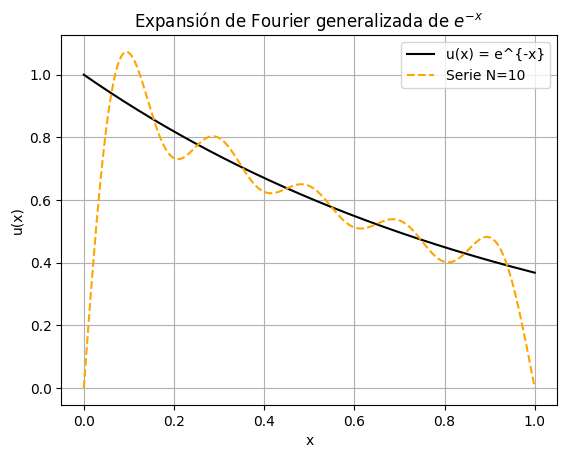

In [39]:
x_vals = np.linspace(0, 1, 400)
u_vals = u(x_vals)
approx_vals = fourier_series(x_vals, N_terms=10)

plt.plot(x_vals, u_vals, label="u(x) = e^{-x}", color="black")
plt.plot(x_vals, approx_vals, label="Serie N=10", linestyle="--", color="orange")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Expansión de Fourier generalizada de $e^{-x}$")
plt.legend()
plt.grid(True)
plt.show()
